# Weather Prediction

In [1]:
import pandas as pd

weather = pd.read_csv("local_weather.csv", index_col="DATE")

In [2]:
weather.head()

,STATION,NAME,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,PGTM,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1960-01-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-04,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


### Data Cleaning and Processing

In [3]:
weather.isnull().sum()/weather.shape[0] # counting null values in columns and divide it by row number to get percentage

STATION    0.000000
NAME       0.000000
ACMH       0.653360
ACSH       0.653360
AWND       0.522451
DAPR       0.999525
FMTM       0.870099
FRGT       0.999881
MDPR       0.999525
PGTM       0.495106
PRCP       0.016668
SNOW       0.324990
SNWD       0.317634
TAVG       0.879174
TMAX       0.000534
TMIN       0.000593
TSUN       0.931728
WDF1       0.653360
WDF2       0.522392
WDF5       0.527552
WDFG       0.746901
WSF1       0.653360
WSF2       0.522332
WSF5       0.527552
WSFG       0.746901
WT01       0.779939
WT02       0.980248
WT03       0.992941
WT04       0.999763
WT05       0.998339
WT07       0.999881
WT08       0.810368
WT09       0.999881
WT16       0.884038
WT18       0.999822
dtype: float64

In [4]:
core_weather = weather[["PRCP", "SNOW", "SNWD", "TMAX", "TMIN"]]

In [5]:
core_weather.columns = ["precip", "snow", "snow_depth", "temp_max", "temp_min"]

In [6]:
core_weather.head()

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1960-01-01,0.0,0.0,0.0,49.0,30.0
1960-01-02,0.0,0.0,0.0,49.0,29.0
1960-01-03,0.0,0.0,0.0,54.0,35.0
1960-01-04,0.0,0.0,0.0,54.0,36.0
1960-01-05,0.0,0.0,0.0,55.0,33.0


In [7]:
core_weather.isnull().sum()

precip         281
snow          5479
snow_depth    5355
temp_max         9
temp_min        10
dtype: int64

In [8]:
core_weather['snow'].value_counts()

0.0    11379
1.0        1
Name: snow, dtype: int64

In [9]:
core_weather['snow_depth'].value_counts()

0.0    11504
Name: snow_depth, dtype: int64

In [10]:
core_weather.drop(['snow','snow_depth'],axis = 1,inplace = True)

C:\Users\shant\AppData\Local\Temp\ipykernel_5796\1096403987.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  core_weather.drop(['snow','snow_depth'],axis = 1,inplace = True)


In [11]:
core_weather.head()

,precip,temp_max,temp_min
DATE,,,
1960-01-01,0.0,49.0,30.0
1960-01-02,0.0,49.0,29.0
1960-01-03,0.0,54.0,35.0
1960-01-04,0.0,54.0,36.0
1960-01-05,0.0,55.0,33.0


In [12]:
core_weather.isnull().sum()

precip      281
temp_max      9
temp_min     10
dtype: int64

In [13]:
core_weather.loc["2013-12-10":"2013-12-20"]

,precip,temp_max,temp_min
DATE,,,
2013-12-10,0.0,54.0,31.0
2013-12-11,0.0,53.0,31.0
2013-12-12,0.0,54.0,31.0
2013-12-13,0.0,53.0,34.0
2013-12-14,0.0,57.0,31.0
2013-12-15,NaN,58.0,33.0
2013-12-16,0.0,66.0,36.0
2013-12-17,0.0,60.0,39.0
2013-12-18,0.0,56.0,36.0


In [14]:
core_weather["precip"] = core_weather["precip"].fillna(0)

C:\Users\shant\AppData\Local\Temp\ipykernel_5796\1614673219.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  core_weather["precip"] = core_weather["precip"].fillna(0)


In [15]:
core_weather.isnull().sum()

precip       0
temp_max     9
temp_min    10
dtype: int64

In [16]:
core_weather.loc["2011-12-18":"2011-12-28"]

,precip,temp_max,temp_min
DATE,,,
2011-12-18,0.0,52.0,33.0
2011-12-19,0.0,55.0,35.0
2011-12-20,0.0,61.0,35.0
2011-12-21,0.0,61.0,NaN
2011-12-22,0.0,62.0,NaN
2011-12-23,0.0,56.0,NaN
2011-12-24,0.0,55.0,NaN
2011-12-25,0.0,54.0,NaN
2011-12-26,0.0,50.0,32.0


In [17]:
core_weather = core_weather.fillna(method="ffill") # replace previous value with previous value that is not null

In [18]:
core_weather.isnull().sum()

precip      0
temp_max    0
temp_min    0
dtype: int64

In [19]:
core_weather.dtypes

precip      float64
temp_max    float64
temp_min    float64
dtype: object

In [20]:
core_weather.index

Index(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04', '1960-01-05',
       '1960-01-06', '1960-01-07', '1960-01-08', '1960-01-09', '1960-01-10',
       ...
       '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22', '2022-01-23',
       '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28'],
      dtype='object', name='DATE', length=16859)

In [21]:
core_weather.index = pd.to_datetime(core_weather.index)

In [22]:
core_weather.index

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2022-01-19', '2022-01-20', '2022-01-21', '2022-01-22',
               '2022-01-23', '2022-01-24', '2022-01-25', '2022-01-26',
               '2022-01-27', '2022-01-28'],
              dtype='datetime64[ns]', name='DATE', length=16859, freq=None)

In [23]:
core_weather.index.year

Int64Index([1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960,
            ...
            2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
           dtype='int64', name='DATE', length=16859)

In [24]:
# Check for missing value defined in data documentation
core_weather.apply(lambda x: (x == 9999).sum())

precip      0
temp_max    0
temp_min    0
dtype: int64

<Axes: xlabel='DATE'>

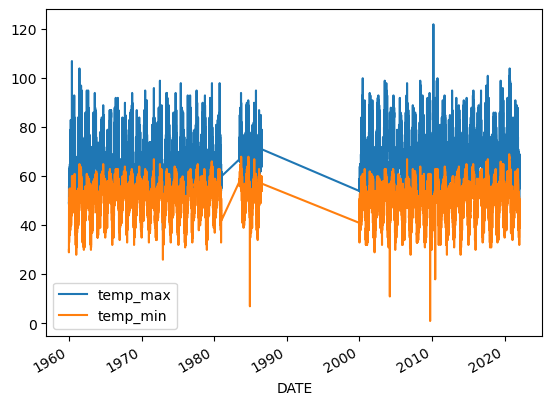

In [25]:
core_weather[["temp_max", "temp_min"]].plot()

<Axes: xlabel='DATE'>

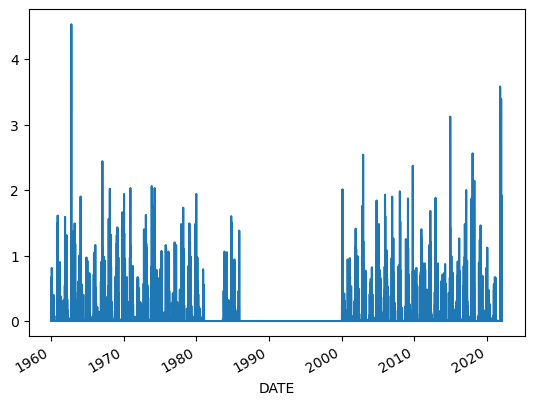

In [26]:
core_weather["precip"].plot()

In [27]:
core_weather.groupby(core_weather.index.year).precip.sum()

DATE
1960    14.01
1961    13.87
1962    22.47
1963    19.11
1964    16.83
1965    16.32
1966    13.11
1967    23.98
1968    17.19
1969    25.70
1970    25.31
1971    10.61
1972    16.27
1973    29.37
1974    16.87
1975    17.54
1976     8.64
1977    11.70
1978    22.57
1979    23.79
1980    13.58
1983     7.13
1984    16.03
1985     8.50
1986     0.00
2000    21.09
2001    22.84
2002    19.12
2003    11.37
2004    12.97
2005    27.37
2006    22.79
2007    12.79
2008    13.86
2009    14.57
2010    22.67
2011    16.06
2012    22.93
2013     4.89
2014    19.62
2015     8.58
2016    19.77
2017    23.34
2018    16.82
2019    20.00
2020     6.42
2021    20.82
2022     0.25
Name: precip, dtype: float64

<Axes: xlabel='DATE'>

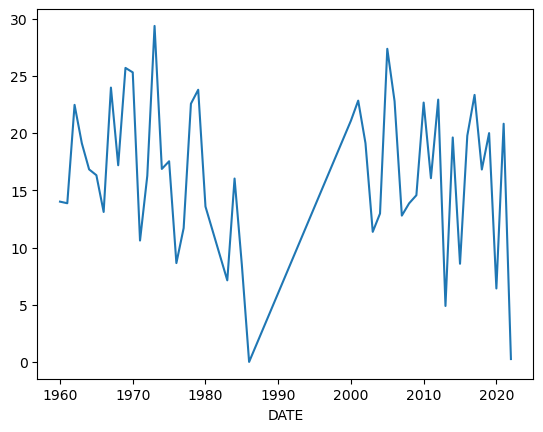

In [28]:
core_weather.groupby(core_weather.index.year).precip.sum().plot()

In [29]:
core_weather.head()

,precip,temp_max,temp_min
DATE,,,
1960-01-01,0.0,49.0,30.0
1960-01-02,0.0,49.0,29.0
1960-01-03,0.0,54.0,35.0
1960-01-04,0.0,54.0,36.0
1960-01-05,0.0,55.0,33.0


In [30]:
# creating a target column from which will be next row value of temp_max column (calculating tomorrow's temp from today)
core_weather["target"] = core_weather.shift(-1)["temp_max"]

In [31]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2022-01-24,0.0,60.0,39.0,57.0
2022-01-25,0.0,57.0,43.0,57.0
2022-01-26,0.0,57.0,41.0,67.0


In [32]:
# Last value of target column in null as there is no next that would be extracted from temp_max column
# delete last row
core_weather.drop(core_weather.index[-1],inplace = True)

In [33]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2022-01-23,0.0,60.0,41.0,60.0
2022-01-24,0.0,60.0,39.0,57.0
2022-01-25,0.0,57.0,43.0,57.0


### Applying Machine Learning Model

In [34]:
from sklearn.linear_model import Ridge
reg = Ridge()

In [35]:
predictors = ["precip", "temp_max", "temp_min"]

In [36]:
train = core_weather.loc[:"2020-12-31"]
test = core_weather.loc["2021-01-01":]

In [37]:
train

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.00,49.0,30.0,49.0
1960-01-02,0.00,49.0,29.0,54.0
1960-01-03,0.00,54.0,35.0,54.0
1960-01-04,0.00,54.0,36.0,55.0
1960-01-05,0.00,55.0,33.0,53.0
...,...,...,...,...
2020-12-27,0.00,63.0,44.0,61.0
2020-12-28,0.10,61.0,42.0,60.0
2020-12-29,0.00,60.0,39.0,56.0


In [38]:
test

,precip,temp_max,temp_min,target
DATE,,,,
2021-01-01,0.00,60.0,40.0,57.0
2021-01-02,0.14,57.0,51.0,56.0
2021-01-03,0.00,56.0,49.0,62.0
2021-01-04,0.36,62.0,46.0,59.0
2021-01-05,0.00,59.0,42.0,59.0
...,...,...,...,...
2022-01-23,0.00,60.0,41.0,60.0
2022-01-24,0.00,60.0,39.0,57.0
2022-01-25,0.00,57.0,43.0,57.0


In [39]:
reg.fit(train[predictors], train["target"])

Ridge()

In [40]:
predictions = reg.predict(test[predictors])

In [41]:
from sklearn.metrics import mean_squared_error

mean_squared_error(test["target"], predictions)

20.56040144563794

In [42]:
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual", "predictions"]

In [43]:
combined

,actual,predictions
DATE,,
2021-01-01,57.0,59.805892
2021-01-02,56.0,59.310292
2021-01-03,62.0,58.538264
2021-01-04,59.0,61.533015
2021-01-05,59.0,59.444068
...,...,...
2022-01-23,60.0,59.985563
2022-01-24,57.0,59.626222
2022-01-25,57.0,58.181406


<Axes: xlabel='DATE'>

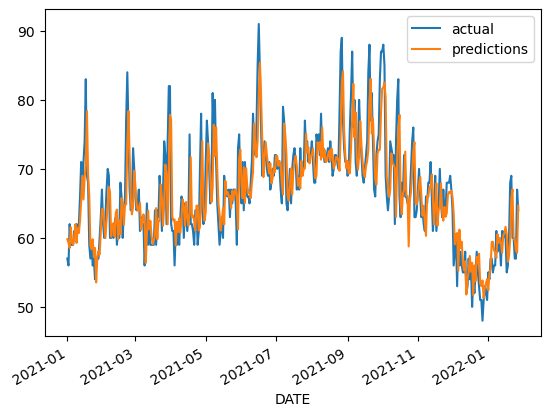

In [44]:
combined.plot()

In [45]:
reg.coef_

array([-2.20342536,  0.72116606,  0.17967066])

In [46]:
combined["diff"] = (combined["actual"] - combined["predictions"]).abs()

In [47]:
combined.sort_values("diff", ascending=False).head(10)

,actual,predictions,diff
DATE,,,
2021-04-01,62.0,77.108911,15.108911
2021-05-07,81.0,67.371927,13.628073
2021-07-07,79.0,66.286453,12.713547
2021-01-17,83.0,70.620900,12.379100
2021-02-21,77.0,64.851571,12.148429
2021-03-29,74.0,61.966907,12.033093
2021-08-26,87.0,75.122600,11.877400
2021-10-16,66.0,77.830077,11.830077
2021-05-29,73.0,61.240774,11.759226


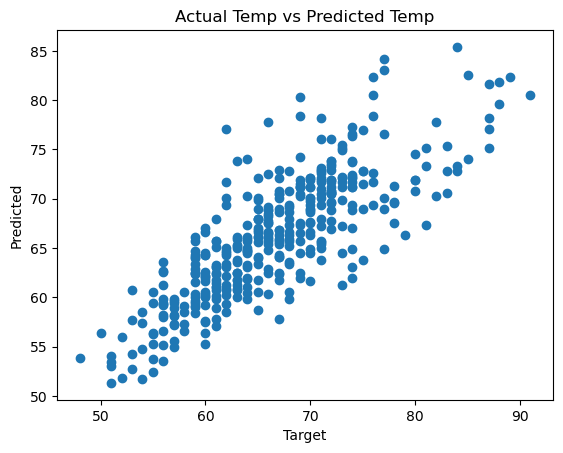

In [48]:
import matplotlib.pyplot as plt
plt.scatter(test['target'], predictions)
plt.xlabel("Target")
plt.ylabel("Predicted")
plt.title("Actual Temp vs Predicted Temp")
plt.show()